In [1]:
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext tensorboard




In [2]:
data = pd.read_csv('data/compound_data.csv')
data = data.rename(columns={'∆Hmix/(kJ·mol −1)': '$\delta$H', '∆Smix /(J·K−1·mol−1)': '$\delta$S'})
#data.set_index('Material')
num_cols = data.columns[data.dtypes.apply(lambda c: np.issubdtype(c, np.number))]

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data[num_cols] = min_max_scaler.fit_transform(data[num_cols])
data

,Material,VEC,∆χ,δ,$\delta$H,$\delta$S,Phase
0,Cu0.5NiAlCoCrFeSi,0.581818,0.111111,0.310948,−22.58,0.766069,AM
1,Zr 17Ta 16Ti 19Nb 22Si 26,0.105455,0.407407,0.577878,−48.64,0.559791,AM
2,Cu50Zr 50,0.672727,0.740741,0.587472,−23.00,0.000000,AM
3,Ni 50Nb 50,0.672727,0.259259,0.338600,−30.00,0.000000,AM
4,PdPtCuNiP,0.981818,0.259259,0.476862,−23.68,0.569507,AM
...,...,...,...,...,...,...,...
113,Y36Sc 20Al 24Co20,0.072727,0.592593,0.717269,−34.92,0.411061,AM
114,Co48Cr 15Mo 14C15B6Er 2,0.563636,0.740741,0.990971,−33.36,0.466368,AM
115,Ti 40Zr 25Cu12Ni 3Be 20,0.498182,0.407407,0.896163,−25.88,0.435725,AM
116,Pt 42.5Cu27Ni 9.5P21,0.985455,0.296296,0.496614,−24.94,0.357997,AM


In [3]:
def float_unicode(arg_str):
    return float(arg_str.decode("utf8").replace(u"\u2212", "-"))


def convert_h(x):
    
    return (float(x.replace(u"\u2212", "-")))

    
data['$\delta$H'] = data['$\delta$H'].apply(convert_h)

<Figure size 1080x1080 with 0 Axes>

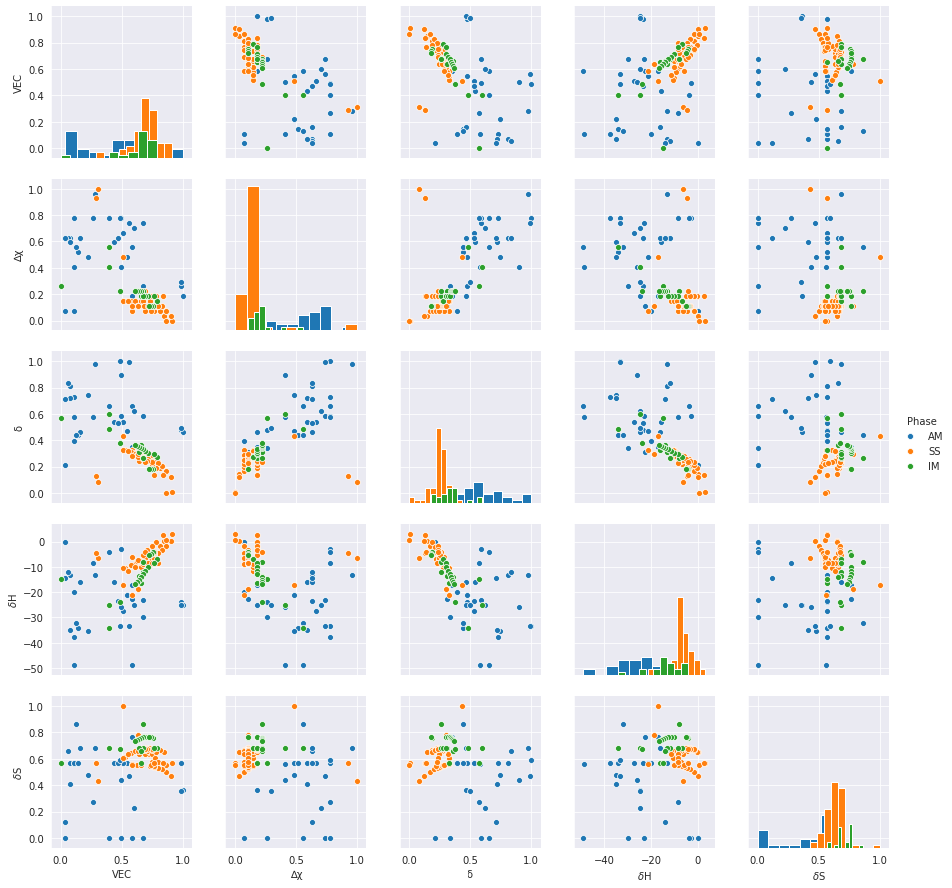

In [4]:
plt.figure(figsize=(15, 15))
sns.set_style("darkgrid")
sns.pairplot(data,hue='Phase',diag_kind='hist')

In [5]:

print (data.corr(method='pearson'))

                VEC        ∆χ         δ  $\delta$H  $\delta$S
VEC        1.000000 -0.631027 -0.596230   0.468331   0.197888
∆χ        -0.631027  1.000000  0.730357  -0.506345  -0.388177
δ         -0.596230  0.730357  1.000000  -0.694720  -0.324097
$\delta$H  0.468331 -0.506345 -0.694720   1.000000   0.202211
$\delta$S  0.197888 -0.388177 -0.324097   0.202211   1.000000


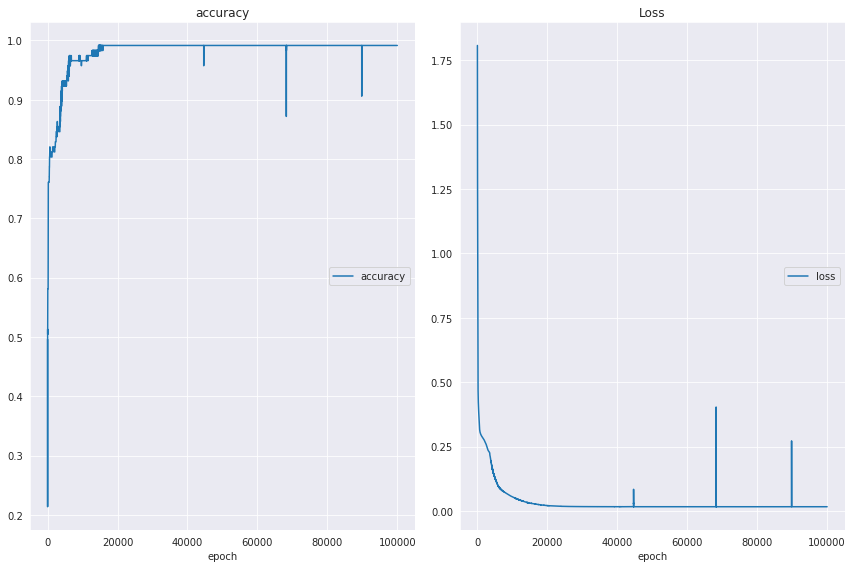

accuracy
	accuracy         	 (min:    0.214, max:    0.991, cur:    0.991)
Loss
	loss             	 (min:    0.016, max:    1.807, cur:    0.016)


In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from livelossplot import PlotLossesKeras
# define the model
import tensorflow as tf
model = Sequential()
model.add(Dense(10, input_shape=(5,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
#kf = KFold(n_splits=4, random_state=None, shuffle=False)

X = data.drop(['Material','Phase'], axis=1).values

y = pd.get_dummies(data.Phase)
y = y.values
# le = preprocessing.LabelEncoder()
# le.fit(y)
# y = le.transform(y)




X = np.asarray(X).astype(np.float32)
#print (X)
callback = tf.keras.callbacks.TensorBoard(log_dir='logs', update_freq='epoch', profile_batch=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001)

#print (y)

model.fit(X_train, y_train, epochs=100000, batch_size=len(X_train), verbose=0,callbacks=[PlotLossesKeras()])
# print (model.predict(X_test))
# model.evaluate(X_test, y_test, verbose=1)


# for train_index, test_index in kf.split(data):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     model.fit(X_train, y_train, epochs=1000, batch_size=4, verbose=0)
#     loss, acc = model.evaluate(X_test, y_test, verbose=0)
#     print ("Loss", loss)
#     print ('accuracy',acc)
# print (y)